<a href="https://colab.research.google.com/github/Yunho-seo/education_center6/blob/main/001_3_1_CNN3%EC%9D%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN
- Channel, convolution, filter, padding, stride, 

In [ ]:
# 순수하게 tensorflow로 코딩하는 CNN 모델
# 순전파, 역전파를 직접 제어한다.

In [1]:
# 텐서플로를 사용하여 MNIST 데이터셋을 로드하고, CNN(컨볼루션 신경망) 모델을 정의
import tensorflow as tf
# Conv1D : 텍스트에서 특징 추출
# Conv2D : 이미지에서 특징 추출 (이미지형태 : 2차원 행렬) (640(가로) x 480(세로)) (Conv2D는 4차원 데이터를 요구)
# 28x28 = 784 : 1차원으로 변형
# Conv3D : 동영상에서 특징 추출
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
mnist = tf.keras.datasets.mnist  # mnist 데이터셋
(x_train, y_train), (x_test, y_test) = mnist.load_data()  # 데이터셋을 로드하여 학습셋과 테스트셋으로 분할
x_train, x_test = x_train / 255.0, x_test / 255.0  # 이미지 데이터를 0과 1 사이의 범위로 정규화(255로 나눔)
print(x_train.shape)  # 60000개의 이미지, 각 이미지는 28x28 픽셀 크기
# 이미지 원형에서 특징을 추출 => Conv2D
x_train = x_train[..., tf.newaxis]  # 차원증가 / 새로운 축을 추가, (60000, 28, 28, 1) (CNN에서 이미지를 처리하기 위한 shape)
x_test = x_test[..., tf.newaxis]  # 새로운 축을 추가, (10000, 28, 28, 1)
x_train.shape  # (60000, 28, 28, 1) => CNN 모델에 입력으로 사용하기 위한 형상(shape) (4차원)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)


(60000, 28, 28, 1)

In [5]:
y_train[:10]  # 원-핫-인코딩이 되지 않은 상태

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [2]:
# Tensorflow의 tf.data.Dataset : 학습 데이터셋과 테스트 데이터셋을 생성
# 학습 데이터셋
# 자동 feeding -> 데이터를 전달한다는 의미.
# 전체 데이터에 대해 배치 사이즈 32개로 분할한 그룹을 가지고 있는 객체
train_ds = tf.data.Dataset.from_tensor_slices(  # x_train은 이미지 데이터, y_train은 해당 이미지 레이블을 가진다.
    (x_train, y_train)).shuffle(10000).batch(32)  # shuffle() : 데이터셋 섞기, batch() : 배치 크기 지정
    # batch(32) : 한번에 32개의 이미지 및 레이블을 처리한다. -> 학습/테스트 스텝에서 처리되는 데이터 양이 결정됨
# 테스트 데이터셋
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

In [3]:
# 모델을 생성하는 방법
# Sequencial, functional, Model 클래스를 상속
class MyModel(Model):
  def __init__(self):  # 네트워크 레이블을 구성하는 layer 초기화
    super(MyModel, self).__init__()  # 상위 클래스(부모)인 Model 생성자를 호출
    # 입력 이미지는 32 x 28 x 28 x 1
    # 필터 사이즈 : 3x3
    # filter를 32번 적용
    self.conv1 = Conv2D(32, 3, activation = 'relu')  # 특징을 추출하는 과정 / 32장의 필터수, 필터사이즈는 3x3 / conv 연산은 relu 
    # 행수 - 필터수 + 1 : padding이 없는 경우, 사이즈 계산하는 공식
    # 28 - 3 + 1 = 26
    # 32 x 26 x 26 x 32
    self.flatten = Flatten()  # CNN 출력을 1차원으로 평탄화 -> FFNN망으로 변환
    # 32장은 개념적으로 소유, 실제 이미지는 26 x 26 x 32 크기로 Flatten() 수행
    self.d1 = Dense(128, activation='relu')  # 128개의 뉴런
    # 21632 * 128 가중치가 생성된다.
    # 실제로 만들어지는 데이터는 32 * 128
    self.d2 = Dense(10, activation='softmax')  # 10개의 뉴런 
    # 가중치 : 128 * 10
    # 실제로 만들어지는 데이터는 32 * 128
  def call(self, x):  # 연산순서를 지정 / call() : 모델의 순방향 전파를 정의한다.
    x = self.conv1(x)  # 입력 x를 self.conv1에 전달하여 conv layer를 통과
    x = self.flatten(x)  # 이전 레이어 출력을 평탄화 -> self.flatten layer 통과
    x = self.d1(x)  # 평탄화된 출력을 self.d1에 전달하여 밀집 연결 layer 통과
    return self.d2(x)  # 10개의 분류데이터에 대한 확률값을 호출한다.
model = MyModel()

In [6]:
# model.summary()

In [ ]:
# tensorflow가 model을 구성하는 방법

# - tensorflow core
# - tensorflow estimator
# - tensorflow keras

In [8]:
# 범주형으로 변환하지 않고 작업을 실시한다.
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()  # 손실 함수 (정수형 레이블 처리 가능)
optimizer = tf.keras.optimizers.Adam()  # Adam : 최적화 알고리즘, 경사 하강법 (모델의 가중치 업데이트)
# Mean() : 평균값을 계산하는 지표(metric), train_loss : 학습단계에서 손실값의 평균을 계산
train_loss = tf.keras.metrics.Mean(name = 'train_loss')  
# 정수형 레이블과 모델 예측결과를 비교하여 정확도 계산
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name = 'train_accuracy') 
# test_loss : 테스트 단계에서의 손실값 평균을 계산
test_loss = tf.keras.metrics.Mean(name = 'test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name = 'test_accuracy')  # 테스트 단계에서의 정확도

In [9]:
@tf.function  # 함수가 최적화된 상태에 @를 붙여서, 미리 컴파일하여 속도를 개선
def train_step(images, labels):  # X, Y
  with tf.GradientTape() as tape:  # 미분 결과를 저장하는 tape
    predictions = model(images)  # 모델의 순전파
    loss = loss_object(labels, predictions)  # cost function
  gradients = tape.gradient(loss, model.trainable_variables)  # 역전파를 수행하여 각 변수의 gradient를 구한다.
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))  # 미분을 적용 -> 모델의 역전파
  train_loss(loss)  # 학습 손실(train_loss) : 계산된 손실값 전달하여 평균 계산
  train_accuracy(labels, predictions)  # 학습 정확도(train_accuracy) : 실제 레이블과 예측값 전달하여 정확도 계산

In [10]:
@tf.function
def test_step(images, labels):
  predictions = model(images)  # 모델에 이미지를 입력으로 전달하여, 예측값을 계산
  t_loss = loss_object(labels, predictions)  # 예측 데이터, 실제 데이터 / 예측값과 실제 레이블간 손실 계산
  test_loss(t_loss)  # 테스트 손실
  test_accuracy(labels, predictions)  # 테스트 정확도

In [11]:
EPOCHS = 5  # 전체 데이터셋에 5번 반복하여 학습 및 테스트 수행
for epoch in range(EPOCHS):
  for images, labels in train_ds:  # 학습 데이터셋에서 이미지와 레이블을 가져와서 루프 수행
    train_step(images, labels)  # 가중치를 학습
  for test_images, test_labels in test_ds:  # 테스트 데이터셋에서 이미지와 레이블을 가져와서 루프 수행
    test_step(test_images, test_labels)  # 데이터(모델)를 테스트
  template = "에포크: {}, 손실: {}, 정확도: {}, 테스트 손실: {}, 테스트 정확도: {}"
  print(template.format(epoch + 1,  # epoch 값을 증가시킴
                        train_loss.result(),  # 학습 손실
                        train_accuracy.result() * 100,  # 학습 정확도
                        test_loss.result(),  # 테스트 손실
                        test_accuracy.result() * 100))  # 테스트 정확도

에포크: 1, 손실: 0.13855184614658356, 정확도: 95.86000061035156, 테스트 손실: 0.05984807759523392, 테스트 정확도: 97.94999694824219
에포크: 2, 손실: 0.09099370986223221, 정확도: 97.22750091552734, 테스트 손실: 0.054737091064453125, 테스트 정확도: 98.13999938964844
에포크: 3, 손실: 0.06799207627773285, 정확도: 97.9183349609375, 테스트 손실: 0.05359188839793205, 테스트 정확도: 98.16999816894531
에포크: 4, 손실: 0.054575804620981216, 정확도: 98.31625366210938, 테스트 손실: 0.05416795238852501, 테스트 정확도: 98.22999572753906
에포크: 5, 손실: 0.045751895755529404, 정확도: 98.57733154296875, 테스트 손실: 0.05547318980097771, 테스트 정확도: 98.24400329589844


In [14]:
# 필터 : 가중치
3*3*32 + 32

320

In [28]:
# 32(배치 사이즈) * 이미지사이즈 28(가로) * 28(세로)
# 패딩하지 않아 사이즈가 줄어듬 (28 -> 26 사이즈)
flatten = 32 * 26 * 26
flatten

21632

In [30]:
flatten * 128  + 128  # 128 (나가는 횟수(뉴런)), 바이어스 더하기(128)

2769024

In [31]:
128 * 10 + 10  # 128, 10개로 통과, 바이어스 더하기(10)

1290

In [12]:
model.summary()  # keras 모델에서 사용하는 함수, tensorflow core에서는 동작하지 않는다.

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             multiple                  320       
                                                                 
 flatten (Flatten)           multiple                  0         
                                                                 
 dense (Dense)               multiple                  2769024   
                                                                 
 dense_1 (Dense)             multiple                  1290      
                                                                 
Total params: 2,770,634
Trainable params: 2,770,634
Non-trainable params: 0
_________________________________________________________________


# CNN 2
- pooling의 사용

In [2]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
# pooling은 max pooling, average pooling
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical  # 범주형(이진벡터)으로 변환
from tensorflow.keras.datasets import mnist
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import numpy
import os
import tensorflow as tf

In [3]:
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)  # 텐서플로우의 난수 생성기 시드 값 3

In [4]:
# mnist 데이터셋 로드하고 전처리하는 과정을 통해 mnist 데이터셋을 CNN 모델에 사용할 수 있도록 변환

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()  # mnist 데이터셋 로드, 학습 데이터셋과 테스트 데이터셋
# 학습데이터인 X_train의 shape을 (샘플수, 28, 28, 1)로 변경 : 이미지 데이터를 CNN 모델에 입력하기 위한 형태
# 데이터 타입을 32비트 실수형으로 변환하고, 255로 나누어 픽셀값을 0 ~ 1 사이 범위로 정규화
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
# Y_train, Y_test를 원-핫 인코딩 형태로 변환, to_categorical() : 정수형 레이블을 이진벡터로 변환
Y_train = to_categorical(Y_train)  # 범주형
Y_test = to_categorical(Y_test)

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Y_train[:10]  # 10x10

In [5]:
model = Sequential()  # Sequential 모델 생성 (레이어를 선형으로 쌓는 방식)
# input = 200 x 28 x 28 x 1
# Conv2D 레이어 : 32개 필터, 3x3 사이즈의 커널 / 28x28 크기의 흑백 이미지, relu()
model.add(Conv2D(32, kernel_size = (3, 3), input_shape = (28, 28, 1), activation = 'relu'))
# 가중치 : 3 x 3 x 32 + 32
# 200 x 26 x 26 x 32(32번)
# Conv2D 레이어 : 64개의 필터, 3x3 사이즈의 커널 / 이전 레이어의 출력을 입력으로 받는다.
model.add(Conv2D(64, (3, 3), activation = 'relu'))
# 가중치 : 3*3*64+64
# 200 x 24 x 24 x 64
# 2x2 크기의 pooling 윈도우를 사용, 이전 layer 출력에서 최대값을 추출하여 특성 map의 크기를 줄인다.
model.add(MaxPooling2D(pool_size = 2))  # MaxPolling2D 진행 시, 사이즈가 반으로 줄어든다.
# 200 x 12 x 12 x 64
model.add(Dropout(0.25))  # 드롭아웃 비율이 0.25인 Dropout layer (뉴런 일부를 비활성화, 과적합 방지 목적)
model.add(Flatten())  # 이전 레이어의 출력을, 2D 특성 map에서 1D 벡터로 변환 (평탄화)
# Flatten() 수행 시 200 x 9216 
model.add(Dense(128, activation = 'relu'))  # 128개의 뉴런을 가진 Dense layer
# 가중치 : 9216 * 128 = 1179648 + 128(bias)
# 데이터는 200 x 128
model.add(Dropout(0.5))  # 드롭아웃 비율이 0.5인 Dropout layer 추가
model.add(Dense(10, activation = 'softmax'))  # 10개의 뉴런을 가진 Dense layer / 소프트맥스(클래스별 확률분포 출력)
# 가중치 : 128 * 10 + 10
# 200 x 10
model.compile(loss = 'categorical_crossentropy',  # 손실 함수
              optimizer = 'adam',  # 옵티마이저 Adam (효율적인 학습)
              metrics = ['accuracy'])  # 평가 지표는 Accuracy(정확도)

In [6]:
MODEL_DIR = './model/'  # 모델 저장할 디렉터리 경로
if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)  # 디렉터리 없으면, 생성한다.

modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'  # 경로 지정 / 파일명에는 에포크와 검증손실이 포함
# ModelCheckpoint 콜백을 생성 / 매 epoch마다 검증손실 개선시 모델을 저장
checkpointer = ModelCheckpoint(filepath = modelpath, moniter = 'val_loss', verbose = 1,
                               save_best_only = True)  # 최상의 성능을 보인 모델만 저장
# EarlyStopping 콜백 생성 / 검증손실 개선이 멈추면, 학습 조기종료 (10번의 epoch동안 개선이 없을 경우 학습 종료)
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10)

# 모델 학습 (train으로 학습 수행, test로 검증을 수행)
# epochs 30 (30번 수행), 배치 크기는 200, verbose = 0 (학습진행상황 출력x), 
history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 30,
                    batch_size = 200, verbose = 0, callbacks = [early_stopping_callback,
                                                                checkpointer])  # 콜백
print('\n Test Accuracy: %.4f' % (model.evaluate(X_test, Y_test)[1]))  # 테스트 데이터에 대한 정확도 평가 출력


Epoch 1: val_loss improved from inf to 0.05861, saving model to ./model/01-0.0586.hdf5

Epoch 2: val_loss improved from 0.05861 to 0.03967, saving model to ./model/02-0.0397.hdf5

Epoch 3: val_loss improved from 0.03967 to 0.03535, saving model to ./model/03-0.0353.hdf5

Epoch 4: val_loss improved from 0.03535 to 0.02867, saving model to ./model/04-0.0287.hdf5

Epoch 5: val_loss did not improve from 0.02867

Epoch 6: val_loss improved from 0.02867 to 0.02703, saving model to ./model/06-0.0270.hdf5

Epoch 7: val_loss did not improve from 0.02703

Epoch 8: val_loss did not improve from 0.02703

Epoch 9: val_loss did not improve from 0.02703

Epoch 10: val_loss improved from 0.02703 to 0.02577, saving model to ./model/10-0.0258.hdf5

Epoch 11: val_loss did not improve from 0.02577

Epoch 12: val_loss did not improve from 0.02577

Epoch 13: val_loss did not improve from 0.02577

Epoch 14: val_loss did not improve from 0.02577

Epoch 15: val_loss did not improve from 0.02577

Epoch 16: val

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [14]:
# 문제
# optimizer = ['RMSprop', 'Adam']
# learning_rate = [1.0, 0.1, 0.01, 0.001, 0.0001]에 대하여
# parameter tuning을 실시

def baseline_model(optimizer='Adam', learning_rate = 0.001):
  model = Sequential()
  model.add(Conv2D(32, kernel_size = (3, 3), input_shape = (28, 28, 1), activation = 'relu'))
  model.add(Conv2D(64, (3, 3), activation = 'relu'))
  model.add(MaxPooling2D(pool_size = 2))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(128, activation = 'relu'))
  model.add(Dropout(0.5))
  model.add(Dense(10, activation = 'softmax'))
  if optimizer == 'Adam':
    optimizer = tf.keras.optimizers.Adam(learning_rate)
  elif optimizer == 'RMSprop':
    optimizer = tf.keras.optimizers.RMSprop(learning_rate)
  model.compile(loss = 'categorical_crossentropy',
                optimizer = optimizer, metrics = ['accuracy'])
  return model

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
model = KerasClassifier(build_fn = baseline_model, verbose = 1)
optimizer = ['RMSprop', 'Adam']
learning_rate = [1.0, 0.1, 0.01, ]
parameters = dict(optimizer = optimizer, learning_rate = learning_rate)

clf = GridSearchCV(estimator = model, param_grid = parameters, cv = 5)
result = clf.fit(X_train, Y_train, epochs = 30, batch_size = 200,)

In [16]:
print("Best: %f using %s" % (result.best_score_,
                             result.best_params_))

Best: 0.986917 using {'learning_rate': 0.01, 'optimizer': 'RMSprop'}


In [ ]:
# 문제
# 어제 실습했던 ModelCheckpoint, EarlyStopping을 적용하기

MODEL_DIr = './model/'
if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)

modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpoint = ModelCheckpoint(filepath = modelpath, moniter = 'val_loss', verbose = 1,
                             save_best_only = True)
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10)

model = KerasClassifier(build_fn = baseline_model, verbose = 1,
                        callbacks = [early_stopping_callback, checkpointer])
optimizer = ['RMSprop', 'Adam']
learning_rate = [1.0, 0.1, 0.01, ]
parameters = dict(optimizer = optimizer, learning_rate = learning_rate)

clf = GridSearchCV(estimator = model, param_grid = parameters, cv = 5)
result = clf.fit(X_train, Y_train, epochs = 30, batch_size = 200,)

In [ ]:
# 시각화 문제
# history를 이용하여 validation loss와 loss를 시각화하기

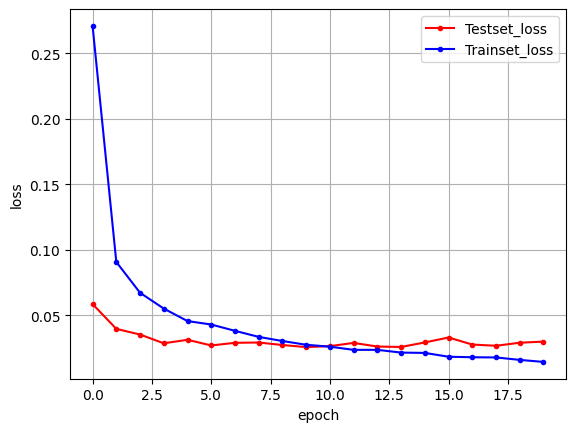

In [11]:
y_vloss = history.history['val_loss']  # validation data
y_loss = history.history['loss']
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')
plt.legend(loc = 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
# 문제
# 1. model의 layer별로 config를 출력
# 2. model의 layer별로 가중치를 출력

In [ ]:
for layer in model.layers:  # 각 레이어에 대한 정보에 접근
  print(layer.get_config())
  print(layer.get_weights())

In [ ]:
# 객체로 전달하는 방식과, 이름으로 전달하는 방식의 차이
# 객체로 전달하는 방식이 유리하다.

In [ ]:
# if문으로 하지 않고 객체를 직접 전달하는 경우
def seq(optimizer, lr):
  model = Sequential()
  model.add(Conv2D(32, kernel_size = (3, 3), input_shape = (28, 28, 1), 
                   activation = 'relu'))
  model.add(Conv2D(64, (3, 3), activation = 'relu'))
  model.add(MaxPooling2D(pool_size = 2))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(128, activation = 'relu'))
  model.add(Dropout(0.5))
  model.add(Dense(10, activation = 'softmax'))
  model.compile(loss = 'categorical_crossentropy', optimizer = optimizer(lr = lr), 
                metrics = ['accuracy'])
  return model

early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10)
from tensorflow.keras import optimizers
gridcv = GridSearchCV(
    KerasClassifier(build_fn = seq, epochs = 30, batch_size = 200),
    {
        'optimizer' : [optimizers.Adam, optimizers.SGD, optimizers.RMSprop,
                       optimizers.Nadam, optimizers.Adamax],
        'lr' : [.5, .1, .01, .001, .00001],
        'validation_data' : [(X_test, Y_test)],
        'callbacks' : [[early_stopping_callback]]
    }, n_jobs = -1, verbose = 10
)
gridcv.fit(X_train, Y_train, epochs = 30, batch_size = 200)

# imageDataGenerator를 이용한 이미지 증강

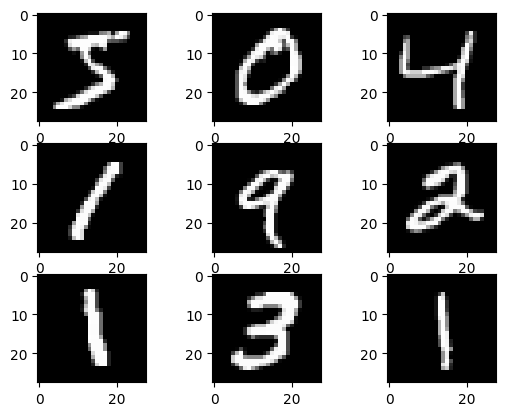

In [21]:
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
(X_train, y_train), (X_test, y_test) = mnist.load_data()
for i in range(0, 9):  # 0부터 8까지의 인덱스 반복, 9개의 이미지 시각화
  pyplot.subplot(330 + 1 + i)  # 서브플롯 위치를 지정
  pyplot.imshow(X_train[i], cmap = pyplot.get_cmap('gray'))  # 흑백 이미지 / i번째 이미지 데이터를 출력(시각화)
pyplot.show()

In [29]:
# 원래 이미지는 784
# X_train_shape[0] : 장수를 의미
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)  # X_train 이미지 데이터가 28x28 크기의 1채널 이미지
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)  # X_test 이미지 데이터가 28x28 크기의 1채널 이미지
X_train = X_train.astype('float32')  # 타입 변환 (실수형 : 모델에 입력하기 위함)
X_test = X_test.astype('float32')
# Z 점수로 정규화 : 공분산 행렬이 단위행렬이 되도록 하기위해

datagen = ImageDataGenerator(zca_whitening = True)  # ZCA 화이트닝 : 이미지 데이터 색상정보를 균등하게 분포, 데이터 증강
datagen = ImageDataGenerator(horizontal_flip = True, vertical_flip = True)  # 이미지를 수평/수직으로 뒤집기
datagen = ImageDataGenerator(width_shift_range = 0.2, height_shift_range = 0.2)  # 좌, 우, 상, 하로 이동

# define data preparation
datagen = ImageDataGenerator(rotation_range = 90)  # 이미지 회전 (90도)

# 이미지 전처리
test_datagen = ImageDataGenerator(rescale = 1./255)  # 이미지를 0 ~ 1 사이 값으로 스케일링(정규화)

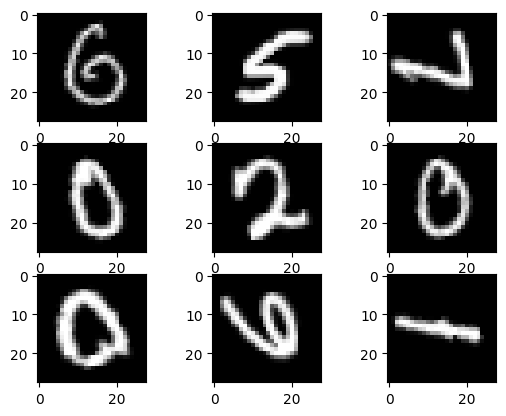

In [30]:
datagen.fit(X_train)  # 내부적으로 데이터에 대한 통계정보 계산 (데이터 증강 수행 전)
# X_train, y_train을 입력으로 받고 batch_size = 9로 하여 한번에 9개의 이미지를 생성
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size = 9, save_to_dir = 'images', save_prefix = 'aug', save_format='png'):  # datagen.flow() : 데이터 증강 수행
  for i in range(0, 9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(X_batch[i].reshape(28, 28), cmap = pyplot.get_cmap('gray'))  # 이미지 shape 바꾸기, 흑백
  pyplot.show()
  break  # 하나의 batch만 생성하고 반복을 종료

In [ ]:
import tensorflow_datasets as tfds
tfds.list_builders()  # Tensorflow에서 제공하는 다양한 데이터셋 / 수작업으로 쓴 숫자 글

In [33]:
# 이미지 로딩
import tensorflow as tf
ds = tfds.load('mnist', split = 'train', shuffle_files = True)  # 데이터셋의 훈련셋 / 파일 임의로 섞기
assert isinstance(ds, tf.data.Dataset)  # ds가 tf.data.Dataset 클래스의 인스턴스인지 확인
print(ds)

<_PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>


In [47]:
ds, info = tfds.load('mnist', split='train', shuffle_files=True, with_info = True)

In [48]:
print(info)

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_path='/root/tensorflow_datasets/mnist/3.0.1',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
)


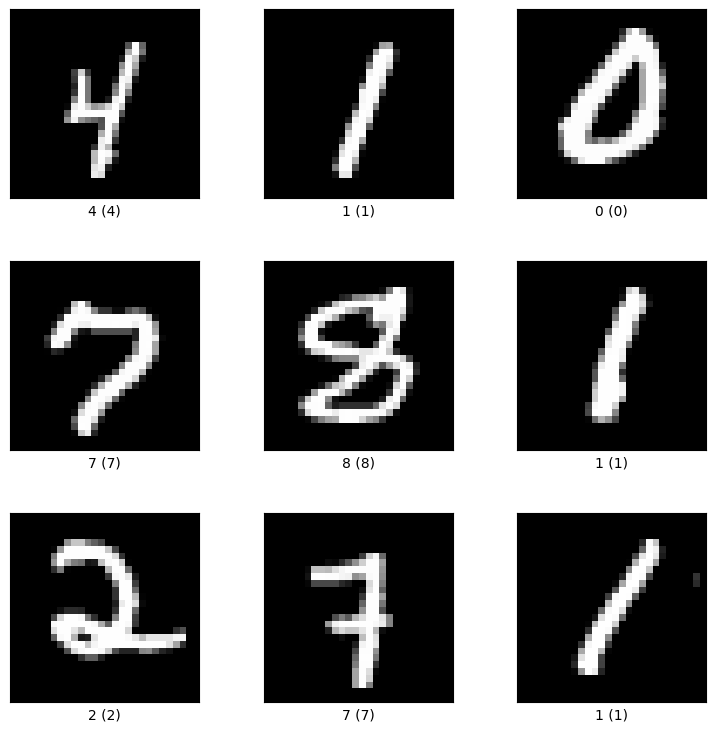

In [38]:
tfds.as_dataframe(ds.take(4), info)
fig = tfds.show_examples(ds, info)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incompleteIS9PZT/cats_vs_dogs-train.tfrecord*...:   0%|…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


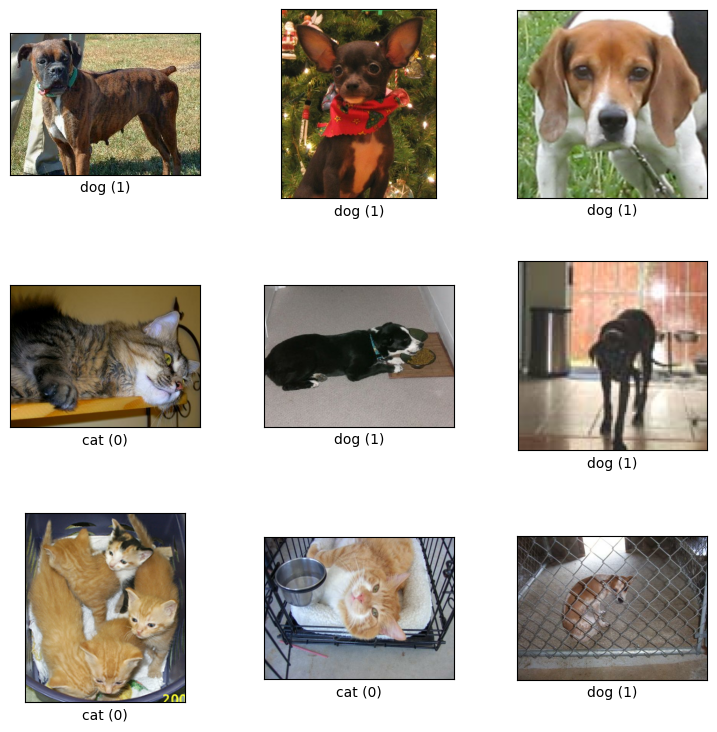

In [39]:
ds, info = tfds.load('CatsVsDogs', split='train', with_info = True)
fig = tfds.show_examples(ds, info)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar100/3.0.2.incompleteL4WEPN/cifar100-train.tfrecord*...:   0%|        …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar100/3.0.2.incompleteL4WEPN/cifar100-test.tfrecord*...:   0%|         …

Dataset cifar100 downloaded and prepared to /root/tensorflow_datasets/cifar100/3.0.2. Subsequent calls will reuse this data.


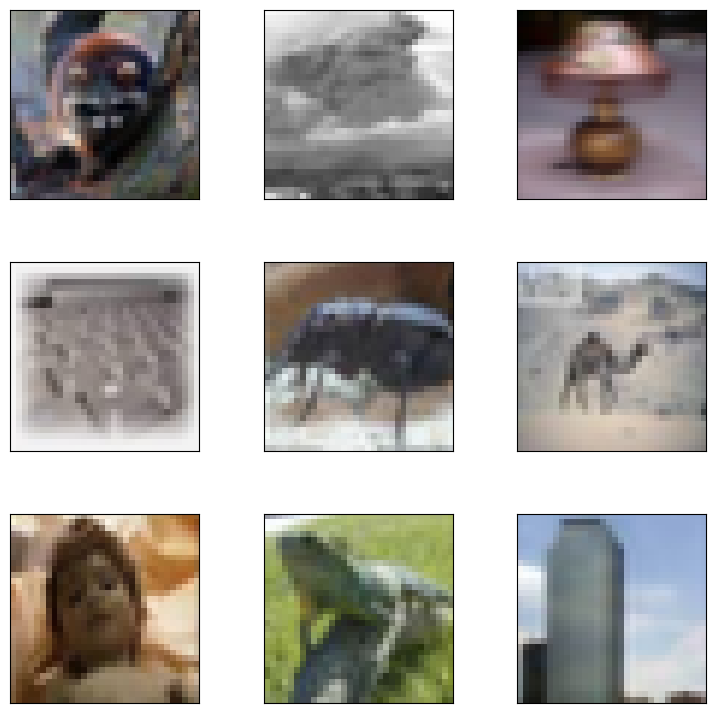

In [42]:
ds, info = tfds.load('cifar100', split='train', with_info = True)  # 100가지 종류의 object를 분류
fig = tfds.show_examples(ds, info)

In [43]:
print(info)  # 데이터셋의 정보

tfds.core.DatasetInfo(
    name='cifar100',
    full_name='cifar100/3.0.2',
    description="""
    This dataset is just like the CIFAR-10, except it has 100 classes containing 600 images each. There are 500 training images and 100 testing images per class. The 100 classes in the CIFAR-100 are grouped into 20 superclasses. Each image comes with a "fine" label (the class to which it belongs) and a "coarse" label (the superclass to which it belongs).
    """,
    homepage='https://www.cs.toronto.edu/~kriz/cifar.html',
    data_path=PosixGPath('/tmp/tmppjs5i1yhtfds'),
    file_format=tfrecord,
    download_size=160.71 MiB,
    dataset_size=132.03 MiB,
    features=FeaturesDict({
        'coarse_label': ClassLabel(shape=(), dtype=int64, num_classes=20),
        'id': Text(shape=(), dtype=string),
        'image': Image(shape=(32, 32, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=100),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=F

In [44]:
info.features  # 데이터셋의 특성 정보를 출력

FeaturesDict({
    'coarse_label': ClassLabel(shape=(), dtype=int64, num_classes=20),
    'id': Text(shape=(), dtype=string),
    'image': Image(shape=(32, 32, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=100),
})

In [ ]:
from tensorflow.keras.datasets import CatsVsDogs
(X_train, y_train), (X_test, y_test) = CatsVsDogs.load_data()

In [49]:
from zipfile import ZipFile
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import cv2
import random
import numpy as np
import pickle
from tqdm import tqdm
import matplotlib.pyplot as plt

In [69]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD

In [50]:
with ZipFile('/content/drive/MyDrive/dogs_vs_cats-20230601T053814Z-001.zip', 'r') as zip:
  zip.extractall()  # zip파일 압축 해제
  print('done')

done


In [52]:
with ZipFile('/content/dogs_vs_cats/train.zip', 'r') as zip:
  zip.extractall()  # zip파일 압축 해제
  print('done')

done


In [53]:
with ZipFile('/content/dogs_vs_cats/test.zip', 'r') as zip:
  zip.extractall()  # zip파일 압축 해제
  print('done')

done


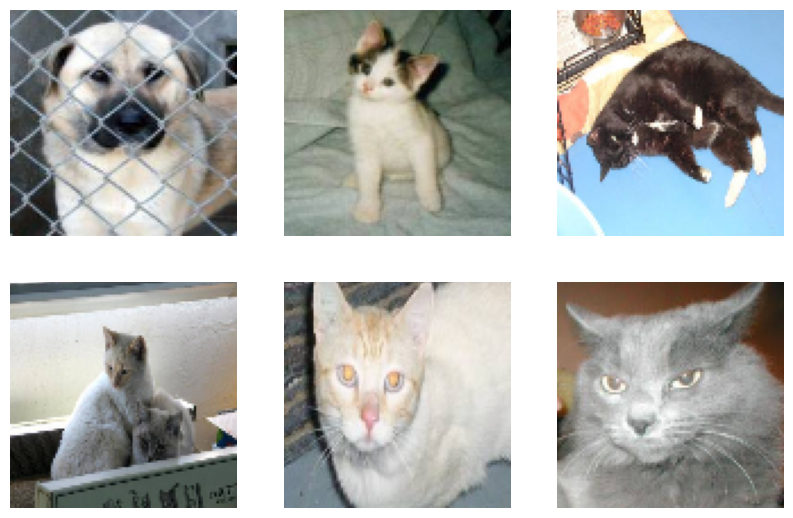

In [55]:
#  디렉토리 내 6개 이미지를 3x3 그리드로 표현, 크기 조정된 이미지를 RGB 색상 채널 순서로 표시

import os
PATH = '/content/train'  # 이미지 파일이 있는 디렉터리 경로
filename = os.listdir(PATH)  # 파일 이름을 리스팅한다.
IMG_SIZE = 100
# OpenCV의 장점 : 동영상에서 이미지를 추출 가능, 모델을 학습하지 않아도 모델 적용(운용)이 가능하다.
plt.figure(figsize=(10, 10))
for i in range(1, 7):  # 1부터 6까지 반복 (3x3 그리드 내 6개의 이미지를 표현하기 위해)
  img_array = cv2.imread(os.path.join(PATH, filename[i]))  # 이미지 파일 불러오기
  # 비대칭 (정방) -> 이미지 왜곡
  resize_image = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # 이미지 크기를 IMG_SIZE로 조정
  plt.subplot(3, 3, i)  # 3x3 그리드에서 현재 위치를 지정하여 서브플롯 생성 
  # OpenCV는 이미지를 읽을 때에 색상을 BGR로 읽는다.
  # 컴퓨터는 RGB
  image = cv2.cvtColor(resize_image, cv2.COLOR_BGR2RGB)  # 이미지 색을 BGR에서 RGB로 변환 
  # plt.figure()
  plt.axis('off')
  plt.imshow(image)

In [57]:
# 디렉터리 내 이미지 파일을 읽어와서 학습 데이터를 생성
# 이미지 파일을 읽어와서 그레이스케일로 변환하고 크기 조정, 이미지와 해당 카테고리를 리스트에 추가
training_data = []  # 학습 데이터 저장할 리스트
x_train = []  # 입력 데이터 저장할 리스트
y_train = []  # 출력 데이터 저장할 리스트
for files in tqdm(os.listdir(PATH)):  # progress bar를 출력
  try:
    if files.find('cat') == -1:  # 파일 이름에 'cat'이 포함되어 있는 이미지를 찾지 못하면
      category = 0  # dog
    else:
      category = 1  # cat
    # 흑백 이미지로 로딩한다.
    img_array = cv2.imread(os.path.join(PATH, files), cv2.IMREAD_GRAYSCALE)  # 이미지 파일을 그레이스케일로
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # 이미지 크기를 IMG_SIZE로 조정
    training_data.append([new_array, category])
    x_train.append([new_array])  # 독립변수
    y_train.append([category])   # 종속변수
  except Exception as e:  # 예외 발생 시 건너뛰기
    pass

100%|██████████| 25000/25000 [00:25<00:00, 971.44it/s] 


In [58]:
x_train = np.array(x_train)  # 리스트를 Numpy 배열로 변환
y_train = np.array(y_train)

In [59]:
# Conv2D 사이즈로 조정
x_train = x_train.reshape(25000, 100, 100, 1)

In [60]:
x_train.shape  # (25000, 100, 100, 1)

(25000, 100, 100, 1)

In [61]:
y_train.shape  # (25000, 1)

(25000, 1)

In [62]:
# 테스트 데이터를 생성
testing_data = []
PATH = '/content/test'  # 테스트 이미지가 있는 디렉터리 경로

for files in tqdm(os.listdir(PATH)):
  try:
    img_array = cv2.imread(os.path.join(PATH, files), cv2.IMREAD_GRAYSCALE)  # 이미지 파일을 그레이스케일로 읽어옴
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # 이미지 크기를 IMG_SIZE로 조정
    testing_data.append([new_array])  # 조정된 이미지를 리스트로 묶어 testing_data[]에 추가한다.
  except Exception as e:
    pass

100%|██████████| 12500/12500 [00:16<00:00, 758.21it/s]


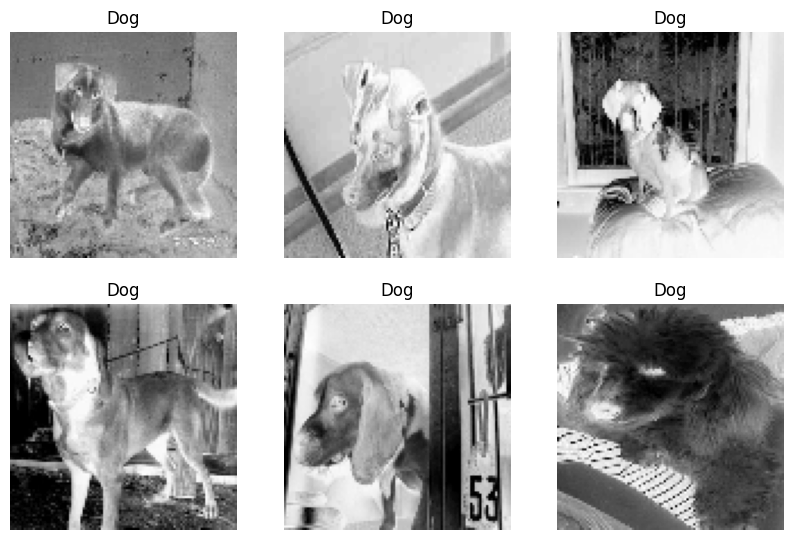

In [63]:
plt.figure(figsize=(10, 10))
for i in range(1, 7):  # 1부터 6까지 반복
  plt.subplot(3, 3, i)  # 3x3 그리드의 i번째 위치에 서브플롯 생성
  plt.axis('off')
  if training_data[10 + i][1] == 0:  # 훈련 데이터 기반으로 제목을 설정한다. 레이블이 0이면 Dog, 아니면 Cat
    plt.title('Dog')
  else:
    plt.title('Cat')
  plt.imshow(training_data[10 + i][0], cmap = 'gray_r')  # 훈련 데이터의 이미지 시각화, 흑백(gray_r)

In [64]:
random.seed(45)  # 난수 생성기 시드 설정 (45는 기본값)
random.shuffle(training_data)  # 훈련 데이터 무작위로 섞기
X = []
y = []
for features, labels in training_data:  # 훈련 데이터에서 특징과 레이블을 반복적으로 추출
  X.append(features.reshape(100, 100, 1))  # 특징을 100x100 크기의 1채널 이미지로 변형하여 X에 추가, 차원변경
  y.append(labels)  # 레이블

In [65]:
# 훈련 데이터 x_train, y_train을 훈련셋과 테스트셋으로 분할
X_train, X_test, y_train, y_test = train_test_split(x_train, y_train,
                                                    test_size = 0.3, random_state = 51)  # 7:3
X_train.shape  # X_train의 크기 확인
# (17500, 100, 100, 1) : 17500(훈련 데이터 개수)

(17500, 100, 100, 1)

In [66]:
X_train = X_train / 255.0  # 정규화, 모든 값은 0과 1 사이의 범위로 조정
X_test = X_test / 255.0

In [67]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)  # 신경망의 일반적인 경우
y_test = to_categorical(y_test)    # 원-핫 인코딩 형식으로 변환 

In [70]:
model = Sequential()
# CNN (Convolution neural network)
model.add(Conv2D(32, kernel_size = (5, 5), activation = 'relu',  # 32개 필터 사용하는 5x5 크기의 Conv layer
                 input_shape = (100, 100, 1)))  # (100, 100, 1) 크기의 이미지를 기대
# 가중치 : 5 x 5 x 32 + 32
# 이미지는 96 x 96 x 32
model.add(Conv2D(64, kernel_size = (5, 5), activation = 'relu'))  # 64개 필터 사용하는 5x5 크기의 Conv layer
# 가중치 : 5 x 5 x 64 + 64
# 이미지는 92 x 92 x 64
model.add(MaxPooling2D(pool_size = (4, 4)))  # 4x4 크기의 MaxPooling layer, 입력부에서 최대값 추출하여 다운샘플링
# 23 x 23 x 64 (3차원)
model.add(Flatten())  # 다차원의 텐서를 1차원으로 평탄화
# 33856

# FFNN
model.add(Dense(512, activation = 'relu'))  # 512개 뉴런을 가지는 Dense 레이어
# 가중치 : 33856 * 512
# 이미지는 배치(batch) 사이즈 * 512
model.add(Dense(2, activation = 'softmax'))  # 2개의 뉴런을 가지는 Dense 레이어 / 출력값을 확률형태로 변환
                                             # 클래스가 2개이므로, 2개의 뉴런이 필요하다.
# 가중치 512 * 2
# 이미지 배치 사이즈 * 2
model.compile(loss = 'categorical_crossentropy', optimizer = SGD(0.001),  # 확률적 경사 하강법
              metrics = ['accuracy'])
model.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_72 (Conv2D)          (None, 96, 96, 32)        832       
                                                                 
 conv2d_73 (Conv2D)          (None, 92, 92, 64)        51264     
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 23, 23, 64)       0         
 g2D)                                                            
                                                                 
 flatten_36 (Flatten)        (None, 33856)             0         
                                                                 
 dense_72 (Dense)            (None, 512)               17334784  
                                                                 
 dense_73 (Dense)            (None, 2)                 1026      
                                                     

In [72]:
batch_size = 32  # 한번에 처리할 데이터의 개수
epochs = 10  # 전체 데이터셋에 대해 학습을 반복할 횟수

history = model.fit(X_train, y_train, batch_size = batch_size, epochs = epochs,
                    verbose = 1, validation_data = (X_test, y_test))  # verbose = 1 : 학습 진행상황
                               # validation_data = (X_test, y_test)) : 학습 중 검증 데이터를 사용하여 모델 성능 평가

score = model.evaluate(X_test, y_test, verbose = 0)  # 학습된 모델을 테스트 데이터로 평가 / verbose = 0 : 출력 생략
print('Test loss: ', score[0])  # 테스트 데이터에 대한 손실값
print('Test Accuracy: ', score[1])  # 테스트 데이터에 대한 정확도

Epoch 1/10
547/547 [==============================] - 17s 31ms/step - loss: 0.6326 - accuracy: 0.6421 - val_loss: 0.6270 - val_accuracy: 0.6524
Epoch 2/10
547/547 [==============================] - 17s 32ms/step - loss: 0.6289 - accuracy: 0.6498 - val_loss: 0.6239 - val_accuracy: 0.6561
Epoch 3/10
547/547 [==============================] - 18s 34ms/step - loss: 0.6258 - accuracy: 0.6525 - val_loss: 0.6256 - val_accuracy: 0.6471
Epoch 4/10
547/547 [==============================] - 16s 29ms/step - loss: 0.6224 - accuracy: 0.6553 - val_loss: 0.6277 - val_accuracy: 0.6479
Epoch 5/10
547/547 [==============================] - 16s 29ms/step - loss: 0.6183 - accuracy: 0.6582 - val_loss: 0.6462 - val_accuracy: 0.6181
Epoch 6/10
547/547 [==============================] - 17s 31ms/step - loss: 0.6143 - accuracy: 0.6629 - val_loss: 0.6316 - val_accuracy: 0.6344
Epoch 7/10
547/547 [==============================] - 17s 30ms/step - loss: 0.6107 - accuracy: 0.6678 - val_loss: 0.6053 - val_accuracy:

In [ ]:
# 문제 
# history의 val_loss와 loss를 시각화
#           val_accuracy와 accuracy를 시각화
# 예측을 하고, 실제 데이터와 비교 후 평가

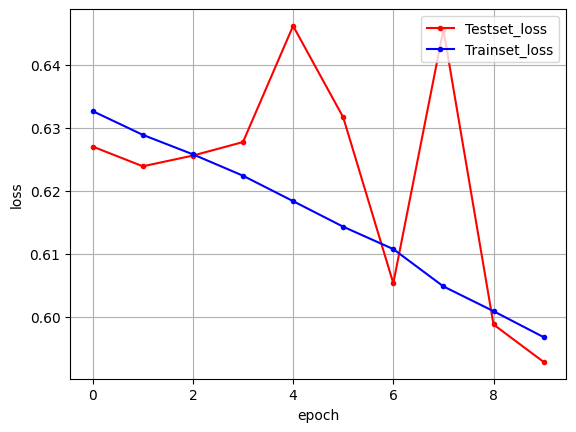

In [73]:
y_vloss = history.history['val_loss']  # validation data
y_loss = history.history['loss']
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')
plt.legend(loc = 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

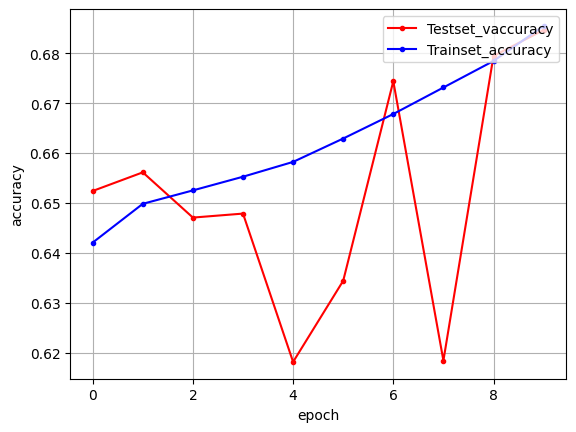

In [77]:
y_vaccuracy = history.history['val_accuracy']  # validation data
y_accuracy = history.history['accuracy']
x_len = numpy.arange(len(y_accuracy))
plt.plot(x_len, y_vaccuracy, marker='.', c='red', label='Testset_vaccuracy')
plt.plot(x_len, y_accuracy, marker='.', c='blue', label='Trainset_accuracy')
plt.legend(loc = 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()